In [1]:
# lets start

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\SWATI\\All my files here ML\\Math Assignment'

In [3]:
os.chdir('C:\\Users\SWATI\Downloads\maths')

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '06-8-23 EDA_Case_Study_Video_Game_Sales .ipynb',
 '29-07-2023 Purchase case study by Tanmay.ipynb',
 '5th_Aug_Intro_to_Linear_Algebra.ipynb',
 'Descriptive Statistics.pptx',
 'Descriptive_Stats_and_Probability (1).ipynb',
 'HR Analytics Case Study (1).pdf',
 'HR analytics_Problem.ipynb',
 'HR_Analytics.ipynb',
 'Inferential Statistics - 1.pptx',
 'Inferential Statistics - 2.pptx',
 'Inferential-Statistics-22nd-July.zip',
 'kerala.csv',
 'Linear algebra.zip',
 'maths 2',
 'people.csv',
 'Probability-1.zip',
 'purchase case study (1).pdf',
 'Purchase_case_study.ipynb',
 'purchase_data.csv',
 'Rank.ipynb',
 'train (1).csv',
 'vgsales.csv']

In [5]:
Purchase = pd.read_csv("purchase_data.csv")

In [6]:
Purchase.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [7]:
Purchase.shape

(263015, 12)

In [8]:
Purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [9]:
Purchase.isna().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

#### drop null value or replace null values
- Less null values--- drop null value (normally for null data between 5% to 10%) 


- More null values (10% or more):
    - dedicated to paticular columns -----   **Drop them** (or for this analysis you can replcae them with zero as tha data missing is in product_category cols. So, we can assume that the customer may not have purchare from category 2 or 3)
    - scattered amoung all the column ------   **Replacement**
     

In [10]:
Purchase['Product_Category_3']= Purchase['Product_Category_3'].fillna(0)

In [11]:
Purchase['Product_Category_2']= Purchase['Product_Category_2'].fillna(0)

In [12]:
Purchase.isna().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Product_Category_2            0
Product_Category_3            0
Purchase                      1
dtype: int64

In [13]:
# Now we can Drop the remaining null values

Purchase.dropna(inplace=True)

In [14]:
Purchase.shape

(263014, 12)

In [15]:
Purchase.duplicated().sum()

0

In [16]:
Purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 26.1+ MB


In [17]:
Purchase["Stay_In_Current_City_Years"].value_counts()

1     92588
2     48580
3     45569
4+    40665
0     35612
Name: Stay_In_Current_City_Years, dtype: int64

In [18]:
# lets replace 4+ with 4 as we can only deal with numeric values

Purchase["Stay_In_Current_City_Years"]=  Purchase["Stay_In_Current_City_Years"].replace("4+",4)

In [19]:
Purchase["Stay_In_Current_City_Years"].value_counts()

1    92588
2    48580
3    45569
4    40665
0    35612
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
Purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 26.1+ MB


In [21]:
Purchase["Stay_In_Current_City_Years"]= pd.to_numeric(Purchase["Stay_In_Current_City_Years"], errors="coerce")

# to_numeric - convert (col) to numeric datatype

# here we use error parameteer so that if their is any other datatype excepth numermic will be compared to null but not throw an error

In [22]:
## Purchase["Stay_In_Current_City_Years"]=Purchase["Stay_In_Current_City_Years"].astype(int)

# astype can handle the error. It will throw as the error.

In [23]:
Purchase['Stay_In_Current_City_Years'].dtype

dtype('int64')

In [24]:
# now that "Stay_In_Current_City_Years" col is numeric 

# Lets try to provide label encoding for object cols

Purchase['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
# Label Encoding can be preformed 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in Purchase.columns:
    if Purchase[col].dtype=="object":
        Purchase[col]=le.fit_transform(Purchase[col])

In [26]:
# now lets check the info again

Purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  int32  
 2   Gender                      263014 non-null  int32  
 3   Age                         263014 non-null  int32  
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  int32  
 6   Stay_In_Current_City_Years  263014 non-null  int64  
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int32(4), int64(2)
memory usage: 22.1 MB


In [27]:
# All our data is now converted to numeric for us to use.

C:\Users\SWATI\Documents\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


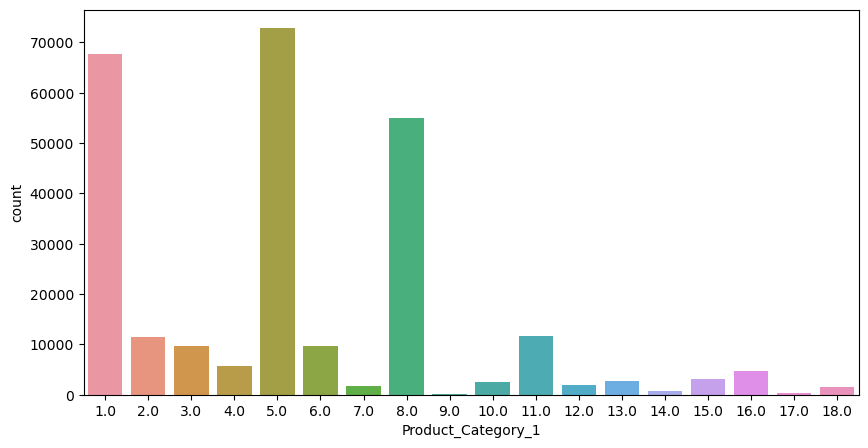

In [28]:
#Visualization

plt.figure(figsize=(10,5))
sns.countplot(Purchase['Product_Category_1'])
plt.show()

In [29]:
#from the product category_1 most people puchases only one item

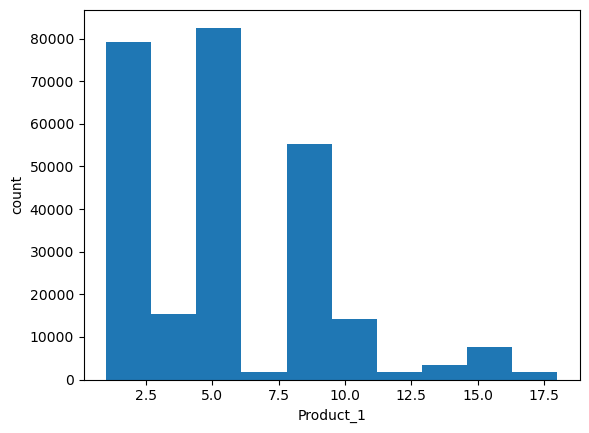

In [30]:
plt.hist(Purchase['Product_Category_1'])
plt.xlabel('Product_1')
plt.ylabel('count')
plt.show()

# STATISTIC ANALYSIS 

### Hypothesis testing
#### Example-  assumption - 60% of men are data scientist

- steps to perform Hypothesis Testing

    - generate two hypothesis:
         - **Null Hypothesis**: 60% of men are data scientist
         - **Alternate Hypothesis**: 60% of men are not data scientist
     - Collect the data and create the samples 
     - select suitable test from( t test, z test, f test based on the problem statement)

     *p-value*--- ( parameter of test [assumption]) (Evidence)
     Reject on Accept the p value based on significance level(0.05)


 -- Note significance level of 0.05 means confidence level of 95% 
    (here for this example know that we will be considering the 55% to 65% for null hypothesis i.e the variance we allow)
    
 -- Also Note that we can change the significance level and increase confidence level if we want but to solve it may be difficult (as the variance range will decreased) 

- **One sample test:** in my assumption if the one sample is being compared by a standard value
    - Ex:Avg salary of men in India is 60K(standard value)
- **Two sample test:** in my assumption if one sample is being compared by another sample
    - Ex avg salary of men in India is same as avg salary of women

### Q1)  It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

- Whenever we compare mean we have two choices : 


    -  **t test** (must be applied when std deviation or variance are not given for the sample) or 
    -  **z test** (must be applied when std deviation or variance is given for the sample)

In [31]:
# t test for the one sample ( as std dev is not given)
# here we have one sample as we are comparing the avg purchase with 10000

In [32]:
#null hypothesis - The mean is 10000
#alternate hypothesis - The mean is not 10000

In [33]:
new_data = Purchase[(Purchase['Age'] == 1) & Purchase['Gender'] == 1]

In [34]:
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
97,1000021,2024,1,1,16.0,1,0,0.0,3.0,12.0,0.0,3055.0
98,1000022,3261,1,1,15.0,0,4,0.0,1.0,8.0,17.0,12099.0
99,1000022,1954,1,1,15.0,0,4,0.0,5.0,8.0,0.0,8797.0
100,1000022,1792,1,1,15.0,0,4,0.0,3.0,4.0,0.0,10681.0
101,1000022,1020,1,1,15.0,0,4,0.0,8.0,14.0,0.0,7801.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262767,1004446,1311,1,1,18.0,1,1,1.0,1.0,2.0,0.0,15431.0
262951,1004465,2880,1,1,4.0,0,1,1.0,5.0,0.0,0.0,1763.0
262952,1004465,1296,1,1,4.0,0,1,1.0,2.0,3.0,4.0,3240.0
262953,1004465,2733,1,1,4.0,0,1,1.0,8.0,0.0,0.0,5832.0


In [35]:
# now we are creating a sample for the above dataset 

sample_size = 3200 # can be 5% to 10% of the population

sample = new_data.sample(sample_size, random_state=0)

## here sample function is used to create the sample from population as its a random function.
## A random fuction always selects new random numbers to fix this state of randomization we use the ** Random_state ** function to
## fix the random value to be the one choosen by the system first time 
## eg: if [1,2,36,8,55] Then if the random function selected [36,55] at the first iteration now it will remain fixed to it. When we rerun the data 
# because random_state parameter.

#Random_state --- can be any positive value 


## Additionally if I give same sample size and random_state number. Then the same row_numbers will be selected even for a different dataset.

In [36]:
sample


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
132607,1002404,2939,1,1,7.0,2,1,0.0,4.0,5.0,0.0,3490.0
202112,1001201,2766,1,1,4.0,2,4,0.0,8.0,0.0,0.0,5904.0
238551,1000818,2129,1,1,4.0,2,2,0.0,5.0,14.0,0.0,5378.0
73984,1005394,2755,1,1,0.0,0,2,0.0,5.0,8.0,0.0,7134.0
258980,1003884,2047,1,1,4.0,0,1,1.0,5.0,8.0,0.0,3678.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233627,1006028,2497,1,1,4.0,0,4,0.0,8.0,14.0,0.0,6034.0
28990,1004415,1570,1,1,0.0,1,1,0.0,1.0,6.0,14.0,11920.0
244534,1001676,1649,1,1,4.0,1,4,0.0,11.0,0.0,0.0,1528.0
245547,1001805,1845,1,1,4.0,2,0,0.0,1.0,2.0,9.0,19368.0


In [37]:
# here we can verify from  population dataset. Therefore

new_data["Purchase"].mean()

9440.512275679841

- Here we can take mean directly from the population dataset.


- However, remember in real life we will never have the population dataset and we will be working directly on the 
sample set itself. ---> REASON 1

- we have to perform *p-value*  for proving this is formal way too ( using formula for stats [maths])  ---> REASON 2

- For why we calculate p-value


### Lets start the statistical test now

In [38]:
assumed_mean = 10000 # in the question

In [39]:
#let import one sample t-test
from scipy.stats import ttest_1samp

In [40]:
t_stat, p_value = ttest_1samp(sample['Purchase'], assumed_mean)
# here ttest_1samp is comparing whether for sample['purchase'] the mean is equal to the assumed_mean or not

print(t_stat, p_value)

-6.345362334309677 2.5317137406184865e-10


NOTE - Statistical test normally returns two values (some may return more)
         - the first is STATISTICS VALUE 
         - the second is the P-VALUE
        
    - Statistical Value ---> is like whatever formula it's using to calculate this thing
    (after putting that Formula) we get the standard value is stored in t_stat. (we do not use this value)
    
    - *P-value* ---> This value is required to accept or reject the test.

In [41]:
# Here p-value is very small as e to the power -10 is their in the p-value.
# i.e 0.000000000025317 etc < 0.05

#P-value is less than 0.05, reject the null hypothesis. 


### Answer : the mean purchase for men aged 18-25 is not 10000. 

### Q2) It was observed that the percentage of women of that spend more than 10000 was 35%. Is it still the same?

In [42]:
# z_ proportion test (used for percentage or proportion) for one sample

# Note only here in this example we do not create sample for this as we are compare the percentage with the population itself.
# In real we have to create sample as the population will be unknown.


# parameters: count, nobs, value

In [43]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%. 

data_new = Purchase[(Purchase['Purchase'] > 10000)]



In [44]:
data_new

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,2304,0,0,10.0,0,2,0.0,1.0,6.0,14.0,15200.0
5,1000003,1768,1,2,15.0,0,3,0.0,1.0,2.0,0.0,15227.0
6,1000004,1684,1,4,7.0,1,2,1.0,1.0,8.0,17.0,19215.0
7,1000004,3213,1,4,7.0,1,2,1.0,1.0,15.0,0.0,15854.0
8,1000004,3481,1,4,7.0,1,2,1.0,1.0,16.0,0.0,15686.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262997,1004472,2433,0,4,16.0,1,0,1.0,1.0,11.0,16.0,15175.0
263001,1004472,1921,0,4,16.0,1,0,1.0,1.0,11.0,15.0,15430.0
263002,1004472,1665,0,4,16.0,1,0,1.0,15.0,16.0,0.0,12567.0
263003,1004472,3209,0,4,16.0,1,0,1.0,1.0,2.0,15.0,15387.0


In [49]:
#No of women in the sample - count parameter 

count = data_new['Gender'].value_counts()[0]


#number of observations
nobs = data_new['Gender'].value_counts().sum()
# nobs = data_new['Gender'].shape[0]



#hypothesised value
percent = 0.35

In [50]:
#one sample z test

from statsmodels.stats.proportion import proportions_ztest

In [51]:
z_stat, p_val = proportions_ztest(count=count, 
                                  nobs=nobs, 
                                  value=percent)
print(z_stat, p_val)

-108.19403500300525 0.0


In [67]:
#p-value is less than 0.05, reject the null hypothesis. 
#the proportion of women spending more than 10000, is not 35%. 

### Answer : the proportion of women spending more than 10000, is not 35%. 

### Q3) It was observed that the average purchase made by men and women of the age 18-25 same?

In [54]:
# t test assumes the two samples have equal variance by default

# t test for 2 sample

In [57]:
#null hypothesis - average spends are equal 
#alternate hypothesis - average spends are not equal

data_men = Purchase[(Purchase['Gender'] == 1)& (Purchase['Age'] == 1)]
data_women = Purchase[(Purchase['Gender'] == 0) & (Purchase['Age'] == 1)]

In [58]:
data_men

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
97,1000021,2024,1,1,16.0,1,0,0.0,3.0,12.0,0.0,3055.0
98,1000022,3261,1,1,15.0,0,4,0.0,1.0,8.0,17.0,12099.0
99,1000022,1954,1,1,15.0,0,4,0.0,5.0,8.0,0.0,8797.0
100,1000022,1792,1,1,15.0,0,4,0.0,3.0,4.0,0.0,10681.0
101,1000022,1020,1,1,15.0,0,4,0.0,8.0,14.0,0.0,7801.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262767,1004446,1311,1,1,18.0,1,1,1.0,1.0,2.0,0.0,15431.0
262951,1004465,2880,1,1,4.0,0,1,1.0,5.0,0.0,0.0,1763.0
262952,1004465,1296,1,1,4.0,0,1,1.0,2.0,3.0,4.0,3240.0
262953,1004465,2733,1,1,4.0,0,1,1.0,8.0,0.0,0.0,5832.0


In [59]:
data_women

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
70,1000018,3406,0,1,3.0,1,3,0.0,5.0,0.0,0.0,1780.0
71,1000018,1740,0,1,3.0,1,3,0.0,3.0,4.0,9.0,10754.0
72,1000018,1371,0,1,3.0,1,3,0.0,4.0,8.0,9.0,2802.0
73,1000018,990,0,1,3.0,1,3,0.0,1.0,2.0,5.0,19473.0
74,1000018,1048,0,1,3.0,1,3,0.0,1.0,2.0,0.0,19672.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262414,1004387,264,0,1,4.0,1,0,0.0,8.0,0.0,0.0,7798.0
262415,1004387,1212,0,1,4.0,1,0,0.0,4.0,5.0,13.0,684.0
262450,1004398,978,0,1,4.0,2,2,0.0,8.0,0.0,0.0,7926.0
262451,1004398,3127,0,1,4.0,2,2,0.0,5.0,0.0,0.0,5183.0


In [60]:
#creating samples
data_men_sample = data_men.sample(3000, random_state=0)
data_women_sample = data_women.sample(800, random_state=0) 

# we can change the 3000 or 800 values ( we are taking 5% - 10% from the population)

In [61]:
# to test the theory 
print(data_men_sample["Purchase"].var())
print(data_women_sample["Purchase"].var())

26166522.560640134
23016563.17006257


In [62]:
# if the variance has a huge difference then we add the parameter equal_var=False by default its true 
# (it will work the same if we donot mention it here)

from scipy.stats import ttest_ind

t_stat_2, p_val_2 = ttest_ind(data_men_sample["Purchase"], data_women_sample["Purchase"],equal_var=True)
print(t_stat_2, p_val_2)

3.924430919420997 8.84743347058331e-05


In [63]:
#we can reject the null hypothesis using the test statistic and since p-value is less than 0.05.
#the average purchases are not the same.

### Answer : the average purchases are not the same.

### Q4) Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35? 

In [64]:

#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

data_group_1 = Purchase[(Purchase['Purchase'] > 10000) & (Purchase['Age']==1)]
data_group_2 = Purchase[(Purchase['Purchase'] > 10000) & (Purchase['Age']==2)]

In [66]:
data_age1_sample = data_group_1.sample(2000, random_state=0)
data_age2_sample = data_group_2.sample(2000, random_state=0)

In [73]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(data_age1_sample.value_counts().sum()), (data_age2_sample.value_counts().sum())]

# or [(len(data_age1_sample)), len(data_age2_sample)]


print(count, nobs)

[1602, 1604] [2000, 2000]


In [74]:
from statsmodels.stats.proportion import proportions_ztest

stat_2sample, p_value_2sample = proportions_ztest(count=count, 
                                                  nobs=nobs, 
                                                  value=0)

# here value is zero as we are comparing the mens percentage versus each. Read the document about the value parameter.


In [75]:
print(stat_2sample, p_value_2sample)

-0.07928079219850037 0.9368092838112458


In [77]:
#p value is more than 0.05, cannot reject the null hypthesis. 
#therefore, Percentage of the men in both the age groups is same

### Answer : Percentage of the men in both the age groups is same